In [11]:
# Load in the trial with 5 evaluations per evaluation
import pandas as pd
import matplotlib.pyplot as plt

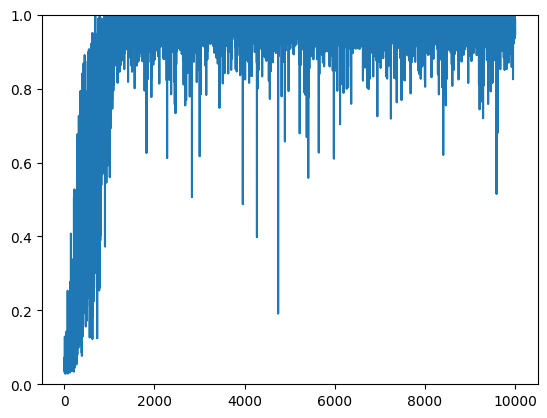

In [71]:
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

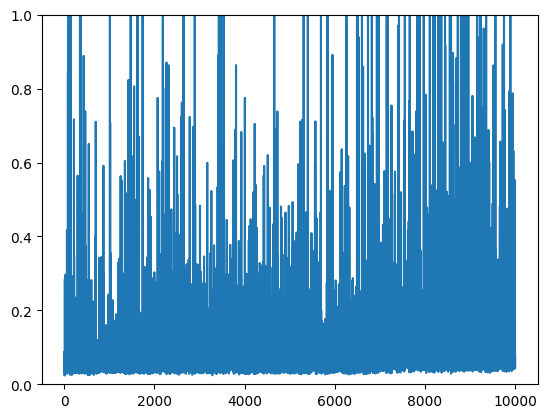

In [30]:
# Ok this is very shakey in the middle but looks quite stable near the end

# Let's compare this to the one where I just lowered the ea parameters. Ok this just made it so that ea couldn't learn
# I probably over-corrected and made the mutation parameters too small? Maybe the combination of random environments
# and low mutation parameters were enough to make this unlearnable
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/lower_ea_params/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

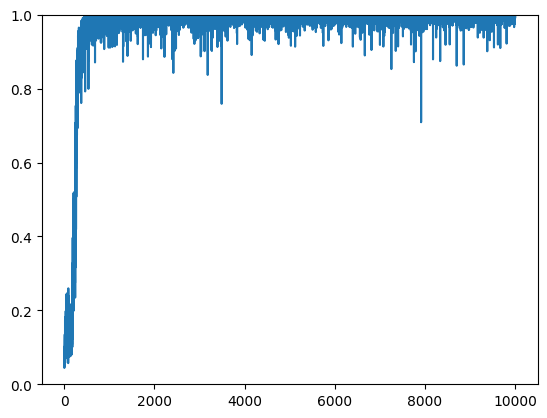

In [77]:
# Okay now let's see what happens when you do 20 evaluations
# (Running this 20 eval experiment while the 5 eval experiment keeps running. Hoping I don't have any issues from Global Interpreter Lock)
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/multiple_evaluations_20/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()

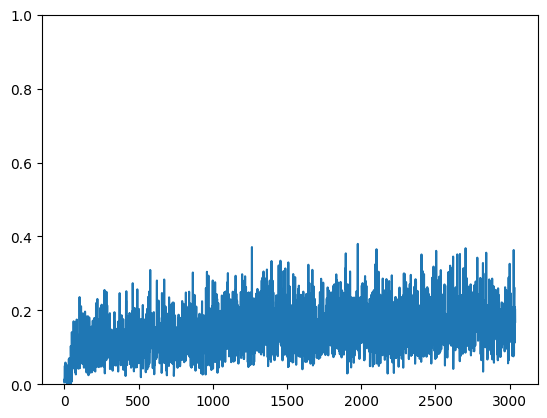

In [89]:
# What if now the rewards become sparser. Observation radius of 10
fitness_dir = "/home/gonzaeve/influence-shaping/results/preliminary/may_20/stabilize_learning/sparsity_10obs_rad/trial_0/fitness.csv"
fitness_df = pd.read_csv(fitness_dir)
plt.plot(fitness_df[" team_fitness"])
plt.ylim([0,1])
plt.show()